In [161]:
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering for ML Models
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score

print("Loading 2024 California reservation data...")

# Import 2024 California reservation data
df = pd.read_csv('data/reservations_2024_california_sample.csv', low_memory=False)

df.head()

Loading 2024 California reservation data...


,historicalreservationid,ordernumber,agency,orgid,codehierarchy,regioncode,regiondescription,parentlocationid,parentlocation,legacyfacilityid,...,totalbeforetax,discount,totalpaid,startdate,enddate,orderdate,nights,numberofpeople,equipmentdescription,equipmentlength
0,4c6ecad6-e531-4d9e-8778-09ac241a5ebc,0561109494-1,NPS,128,|1|70904|74327|74286|70953,PWR,Pacific West Region,74286,Joshua Tree National Park,70953.0,...,10.0,0.0,10.0,2024-02-16T00:00:00Z,2024-02-19T00:00:00Z,2023-09-17T05:32:22.735292Z,3 days,4.0,Pickup Camper,17.0
1,db9b5922-2f88-4146-8920-1f9f0947857a,0687971279-1,NPS,128,|1|70904|74269||10083831,PWR,Pacific West Region,74296,Yosemite National Park,10083831.0,...,10.0,0.0,10.0,2024-08-05T00:00:00Z,2024-08-19T00:00:00Z,2024-07-22T14:04:05.187279Z,14 days,6.0,Small Tent,0.0
2,1260d2c2-1bc5-4725-89ab-41ef8376421e,0675542605-2,USACE,130,|1|70902|74306|74357|73451,CL,South Pacific Division,74586,Success Lake,73451.0,...,60.0,0.0,60.0,2024-07-04T00:00:00Z,2024-07-07T00:00:00Z,2024-05-09T16:59:44.688666Z,3 days,8.0,Tent,0.0
3,c86069a4-6338-5d6b-b1aa-110e910f023a,0635628937-1,NPS,128,|1|70904|74269||445859,PWR,Pacific West Region,74296,Yosemite National Park,NaN,...,10.0,0.0,10.0,2024-08-11T00:00:00Z,NaN,2024-03-01T22:59:53.458469Z,NaN,NaN,NaN,NaN
4,8f00dacf-60be-4192-a703-67a5931450e7,0642589654-1,NPS,128,|1|70904|74327|74286|158792,PWR,Pacific West Region,74286,Joshua Tree National Park,158792.0,...,20.0,0.0,20.0,2024-05-20T00:00:00Z,2024-05-21T00:00:00Z,2023-11-20T15:02:28.215896Z,1 day,2.0,RV,17.0


In [162]:
# Select only relevant columns
relevant_columns = [
    'startdate',      # Reservation start date
    'enddate',        # Reservation end date
    'orderdate',      # When the reservation was made
    'nights',         # Duration
    'park',           # Name of the park
    'facilitystate',  # State - All California for this dataset
    'sitetype',       # Type of campsite - RV, tent, etc.
    'usetype',        # Use type - day, camping, etc
    'numberofpeople', # Size of the group
    'facilityzip'     # Zipcode
]

# Keep only relevant columns
df_filtered = df[relevant_columns].copy()

print(f"\nColumns for analysis:")
print(df_filtered.columns.tolist())
print(f"\nShape: {df_filtered.shape}")
df_filtered.head()


Columns for analysis:
['startdate', 'enddate', 'orderdate', 'nights', 'park', 'facilitystate', 'sitetype', 'usetype', 'numberofpeople', 'facilityzip']

Shape: (279132, 10)


,startdate,enddate,orderdate,nights,park,facilitystate,sitetype,usetype,numberofpeople,facilityzip
0,2024-02-16T00:00:00Z,2024-02-19T00:00:00Z,2023-09-17T05:32:22.735292Z,3 days,BLACK ROCK CAMPGROUND,California,STANDARD NONELECTRIC,Overnight,4.0,92284.0
1,2024-08-05T00:00:00Z,2024-08-19T00:00:00Z,2024-07-22T14:04:05.187279Z,14 days,Porcupine Flat Campground,California,STANDARD NONELECTRIC,Overnight,6.0,95389.0
2,2024-07-04T00:00:00Z,2024-07-07T00:00:00Z,2024-05-09T16:59:44.688666Z,3 days,TULE,California,STANDARD NONELECTRIC,Overnight,8.0,93257.0
3,2024-08-11T00:00:00Z,NaN,2024-03-01T22:59:53.458469Z,NaN,Yosemite National Park Wilderness Permits,California,NaN,NaN,NaN,95389.0
4,2024-05-20T00:00:00Z,2024-05-21T00:00:00Z,2023-11-20T15:02:28.215896Z,1 day,JUMBO ROCKS CAMPGROUND,California,STANDARD NONELECTRIC,Overnight,2.0,92225.0


In [163]:
# Check for missing values in filtered data
print("Missing values per column:")
print(df_filtered.isnull().sum())
print(f"\nMissing value percentage:")
print((df_filtered.isnull().sum() / len(df_filtered) * 100).round(2))

# Check for duplicates
print(f"\nDuplicate rows: {df_filtered.duplicated().sum()}")

Missing values per column:
startdate             0
enddate           42739
orderdate             0
nights            39692
park                  0
facilitystate         0
sitetype          48873
usetype           79455
numberofpeople    44128
facilityzip           0
dtype: int64

Missing value percentage:
startdate          0.00
enddate           15.31
orderdate          0.00
nights            14.22
park               0.00
facilitystate      0.00
sitetype          17.51
usetype           28.47
numberofpeople    15.81
facilityzip        0.00
dtype: float64

Duplicate rows: 2359


In [164]:
# Sanitize data
df_clean = df_filtered.copy()

df_clean = df_clean.drop_duplicates()

# Standardize date
df_clean['startdate'] = pd.to_datetime(df_clean['startdate'], errors='coerce')
df_clean['enddate'] = pd.to_datetime(df_clean['enddate'], errors='coerce')
df_clean['orderdate'] = pd.to_datetime(df_clean['orderdate'], errors='coerce')

# Calculate lead time - days between booking & arrival
df_clean['lead_time_days'] = (df_clean['startdate'] - df_clean['orderdate']).dt.days

# Time based columns
df_clean['booking_month'] = df_clean['orderdate'].dt.month
df_clean['booking_day_of_week'] = df_clean['orderdate'].dt.dayofweek
df_clean['arrival_month'] = df_clean['startdate'].dt.month
df_clean['arrival_day_of_week'] = df_clean['startdate'].dt.dayofweek
df_clean['arrival_quarter'] = df_clean['startdate'].dt.quarter

df_clean = df_clean.dropna(subset=['startdate', 'enddate', 'orderdate'])

df_clean = df_clean[df_clean['lead_time_days'] >= 0]

# Convert nights to numeric
df_clean['nights'] = df_clean['nights'].astype(str).str.extract(r'(\d+)')[0].astype(float)

string_columns = df_clean.select_dtypes(include=['object']).columns
for col in string_columns:
    df_clean[col] = df_clean[col].str.strip()

print(f"Original data: {len(df_filtered)} rows")
print(f"Sanitized data: {len(df_clean)} rows")
print(f"Total removed: {len(df_filtered) - len(df_clean)} rows ({((len(df_filtered) - len(df_clean)) / len(df_filtered) * 100):.2f}%)")
print(f"\nCleaned data :")
df_clean.info()

Original data: 279132 rows
Sanitized data: 216894 rows
Total removed: 62238 rows (22.30%)

Cleaned data :
<class 'pandas.core.frame.DataFrame'>
Index: 216894 entries, 0 to 279131
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   startdate            216894 non-null  datetime64[ns, UTC]
 1   enddate              216894 non-null  datetime64[ns, UTC]
 2   orderdate            216894 non-null  datetime64[ns, UTC]
 3   nights               216894 non-null  float64            
 4   park                 216894 non-null  object             
 5   facilitystate        216894 non-null  object             
 6   sitetype             211360 non-null  object             
 7   usetype              180859 non-null  object             
 8   numberofpeople       216095 non-null  float64            
 9   facilityzip          216894 non-null  float64            
 10  lead_time_days       216894

# Data Visualization

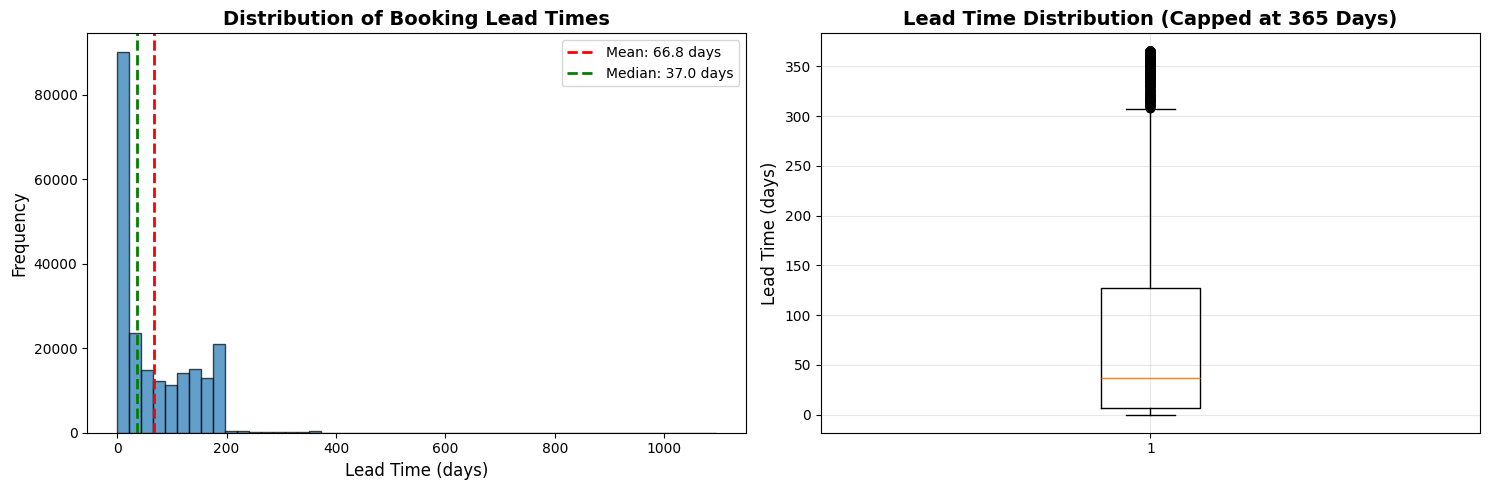

Lead Time:
count    216894.000000
mean         66.775568
std          67.396205
min           0.000000
25%           7.000000
50%          37.000000
75%         127.000000
max        1095.000000
Name: lead_time_days, dtype: float64


In [165]:
plt.rcParams['figure.figsize'] = (12, 6)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# 1. Lead Time Distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Hist of lead times
axes[0].hist(df_clean['lead_time_days'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Lead Time (days)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Booking Lead Times', fontsize=14, fontweight='bold')
axes[0].axvline(df_clean['lead_time_days'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_clean["lead_time_days"].mean():.1f} days')
axes[0].axvline(df_clean['lead_time_days'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_clean["lead_time_days"].median():.1f} days')
axes[0].legend()

# Box plot of lead times - max 1 year
lead_time_capped = df_clean[df_clean['lead_time_days'] <= 365]['lead_time_days']
axes[1].boxplot(lead_time_capped, vert=True)
axes[1].set_ylabel('Lead Time (days)', fontsize=12)
axes[1].set_title('Lead Time Distribution (Capped at 365 Days)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Lead Time:")
print(df_clean['lead_time_days'].describe())

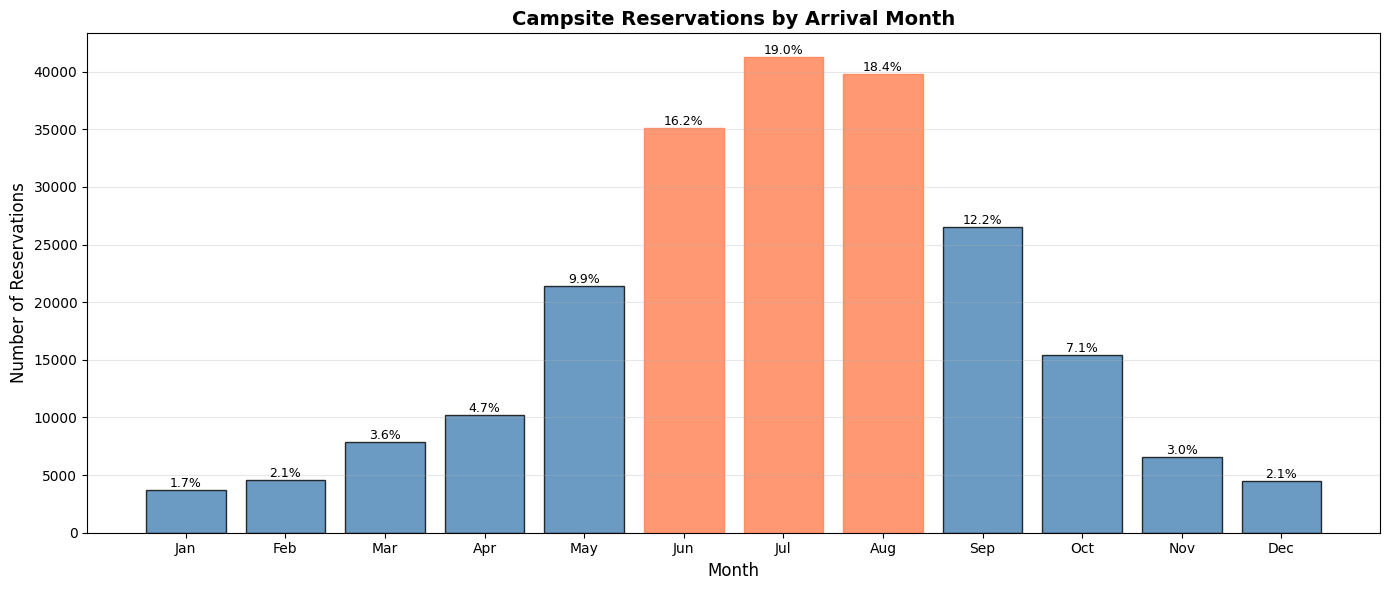


Top 5 months for camping:
arrival_month
7.0    41268
8.0    39801
6.0    35114
9.0    26530
5.0    21400
Name: count, dtype: int64


In [166]:
# 2. Reservations by Arrival Month
fig, ax = plt.subplots(figsize=(14, 6))

arrival_by_month = df_clean['arrival_month'].value_counts().sort_index()

bars = ax.bar(range(1, 13), [arrival_by_month.get(i, 0) for i in range(1, 13)], 
               color='steelblue', edgecolor='black', alpha=0.8)

# Highlight peak months
peak_months = [6, 7, 8]
for i in peak_months:
    bars[i-1].set_color('coral')

ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Number of Reservations', fontsize=12)
ax.set_title('Campsite Reservations by Arrival Month', fontsize=14, fontweight='bold')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(months)
ax.grid(True, axis='y', alpha=0.3)

# Add percentage labels on bars
total_reservations = arrival_by_month.sum()
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = (height / total_reservations) * 100
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{percentage:.1f}%',
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\nTop 5 months for camping:")
print(arrival_by_month.sort_values(ascending=False).head())

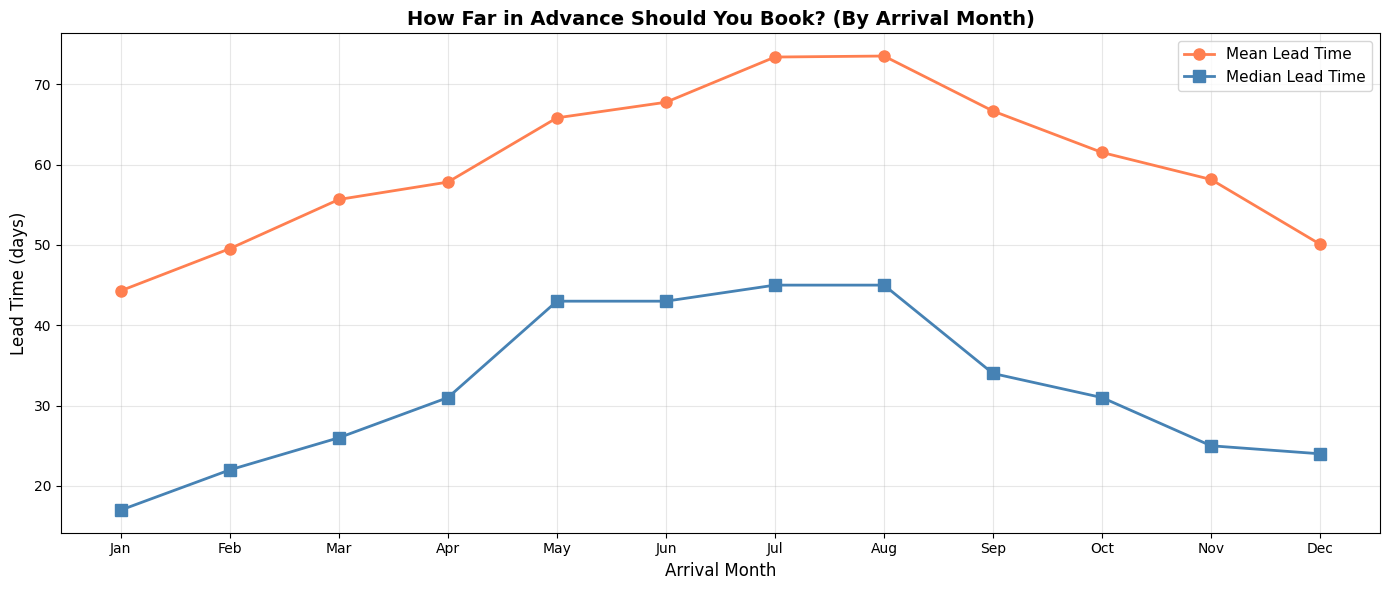


Average Lead Time by Arrival Month:
    arrival_month       mean  median
0             1.0  44.299973    17.0
1             2.0  49.542563    22.0
2             3.0  55.663518    26.0
3             4.0  57.828293    31.0
4             5.0  65.824673    43.0
5             6.0  67.765905    43.0
6             7.0  73.394906    45.0
7             8.0  73.519635    45.0
8             9.0  66.671843    34.0
9            10.0  61.514891    31.0
10           11.0  58.151316    25.0
11           12.0  50.093847    24.0


In [167]:
# 3. Lead Time by Arrival Month - When to Book for Each Month
fig, ax = plt.subplots(figsize=(14, 6))

# Calculate average lead time by arrival month
lead_time_by_month = df_clean.groupby('arrival_month')['lead_time_days'].agg(['mean', 'median']).reset_index()

x = range(1, 13)

# Plot mean and median
ax.plot(x, [lead_time_by_month[lead_time_by_month['arrival_month']==i]['mean'].values[0] if i in lead_time_by_month['arrival_month'].values else 0 for i in x], 
        marker='o', linewidth=2, markersize=8, label='Mean Lead Time', color='coral')
ax.plot(x, [lead_time_by_month[lead_time_by_month['arrival_month']==i]['median'].values[0] if i in lead_time_by_month['arrival_month'].values else 0 for i in x], 
        marker='s', linewidth=2, markersize=8, label='Median Lead Time', color='steelblue')

ax.set_xlabel('Arrival Month', fontsize=12)
ax.set_ylabel('Lead Time (days)', fontsize=12)
ax.set_title('How Far in Advance Should You Book? (By Arrival Month)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nAverage Lead Time by Arrival Month:")
print(lead_time_by_month)

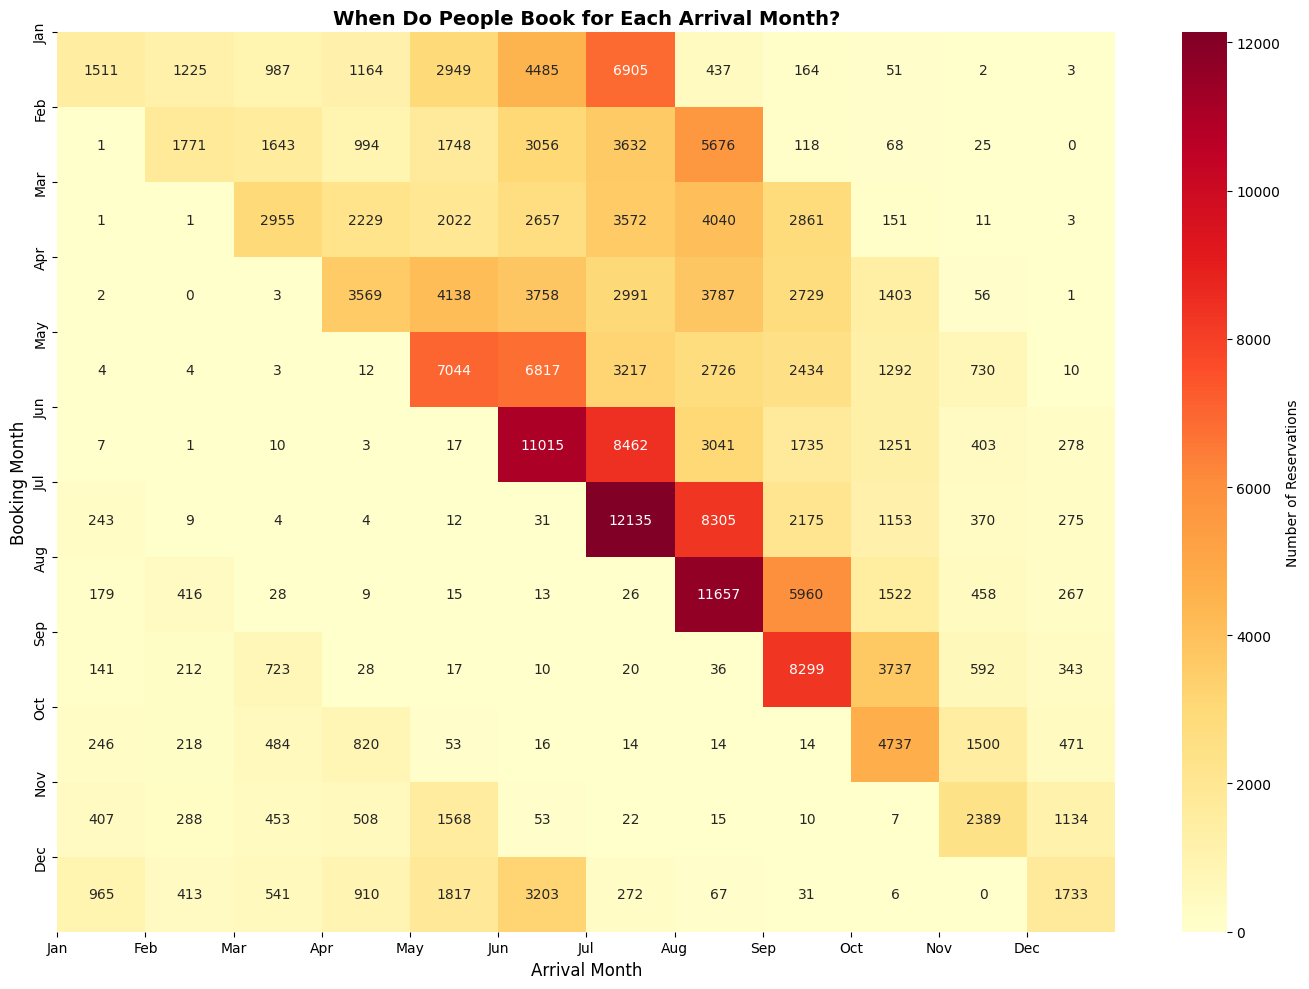

This heatmap shows when people make bookings (Y-axis) for different arrival months (X-axis)


In [168]:
# 4. Heatmap: Booking Month vs Arrival Month
booking_arrival_matrix = pd.crosstab(df_clean['booking_month'], df_clean['arrival_month'])

plt.figure(figsize=(14, 10))
sns.heatmap(booking_arrival_matrix, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Number of Reservations'})
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('Booking Month', fontsize=12)
plt.title('When Do People Book for Each Arrival Month?', fontsize=14, fontweight='bold')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

print("This heatmap shows when people make bookings (Y-axis) for different arrival months (X-axis)")

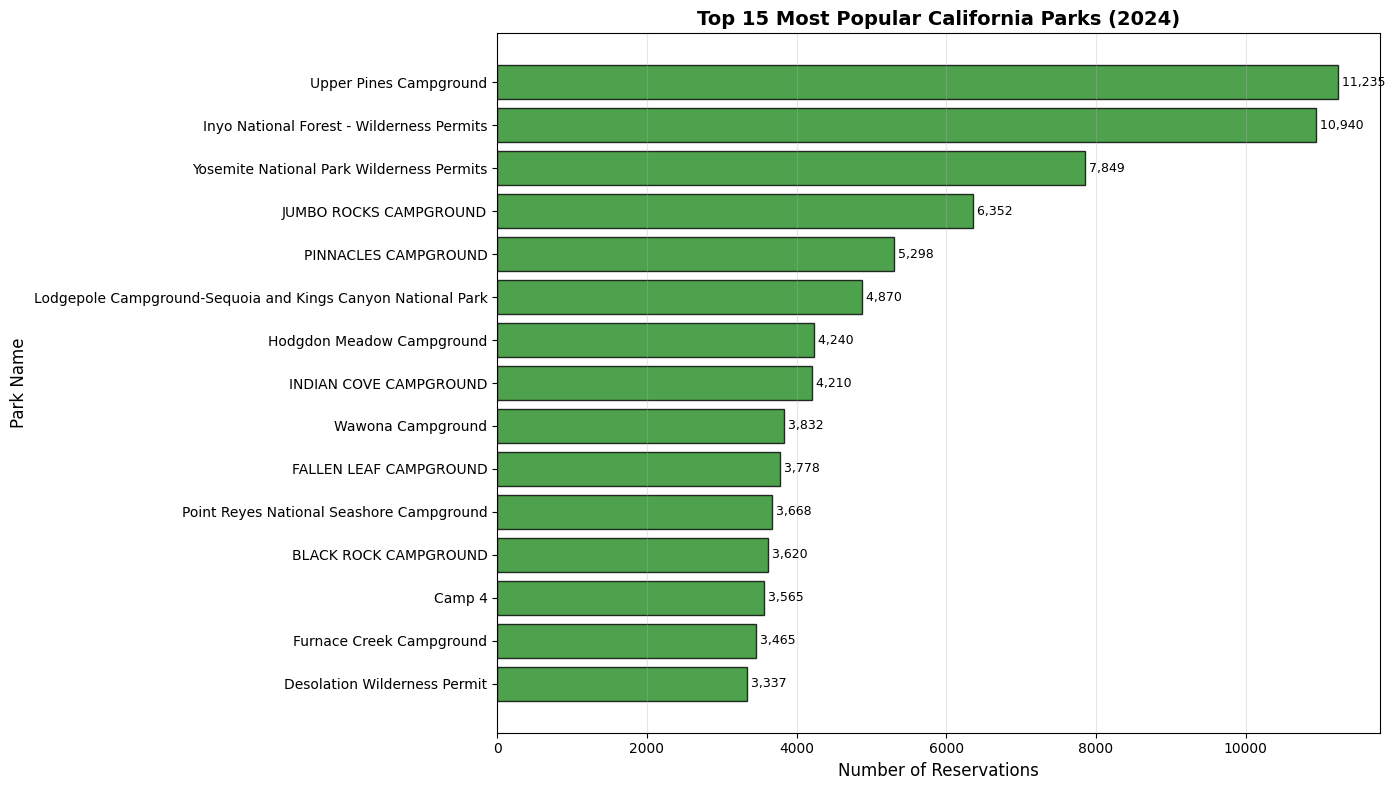


Total unique parks in dataset: 508


In [169]:
# 5. Top 15 Most Popular Parks
top_parks = df_clean['park'].value_counts().head(15)

plt.figure(figsize=(14, 8))
bars = plt.barh(range(len(top_parks)), top_parks.values, color='forestgreen', edgecolor='black', alpha=0.8)
plt.yticks(range(len(top_parks)), top_parks.index)
plt.xlabel('Number of Reservations', fontsize=12)
plt.ylabel('Park Name', fontsize=12)
plt.title('Top 15 Most Popular California Parks (2024)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, top_parks.values)):
    plt.text(value, i, f' {value:,}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\nTotal unique parks in dataset: {df_clean['park'].nunique()}")

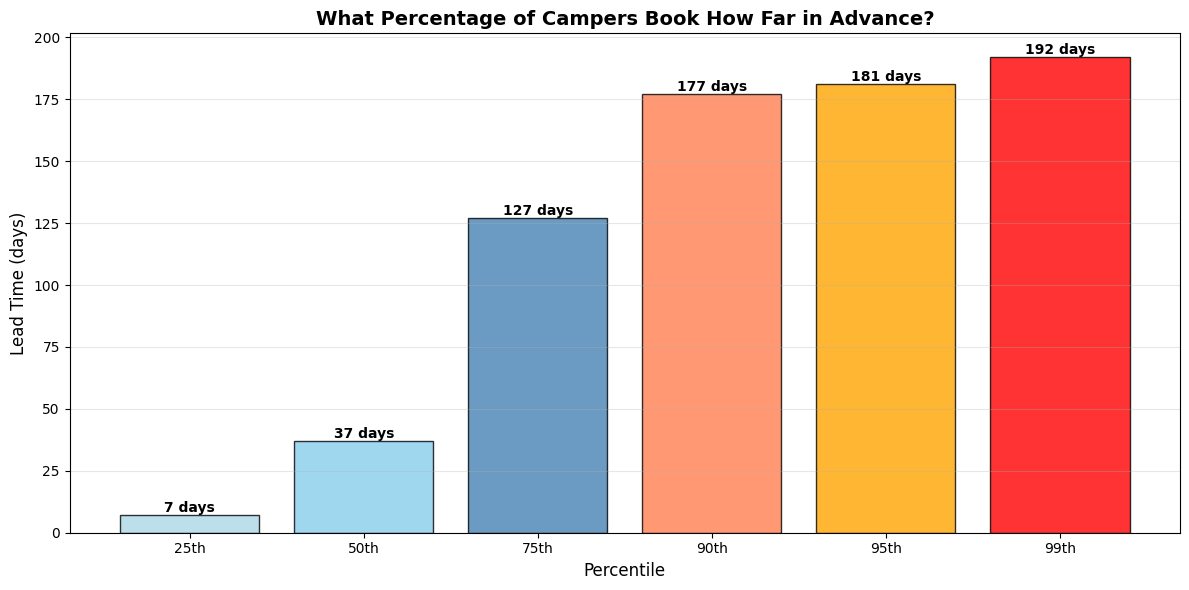


Key Insights:
• 25% of campers book within 7 days
• 50% of campers book within 37 days
• 75% of campers book within 127 days
• 90% of campers book within 177 days
• 95% of campers book within 181 days


In [170]:
# 6. Lead Time Distribution by Percentiles
percentiles = [25, 50, 75, 90, 95, 99]
lead_time_percentiles = [df_clean['lead_time_days'].quantile(p/100) for p in percentiles]

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(percentiles)), lead_time_percentiles, 
               color=['lightblue', 'skyblue', 'steelblue', 'coral', 'orange', 'red'],
               edgecolor='black', alpha=0.8)

plt.xlabel('Percentile', fontsize=12)
plt.ylabel('Lead Time (days)', fontsize=12)
plt.title('What Percentage of Campers Book How Far in Advance?', fontsize=14, fontweight='bold')
plt.xticks(range(len(percentiles)), [f'{p}th' for p in percentiles])
plt.grid(True, axis='y', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, lead_time_percentiles)):
    plt.text(i, value, f'{value:.0f} days', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nKey Insights:")
print(f"• 25% of campers book within {lead_time_percentiles[0]:.0f} days")
print(f"• 50% of campers book within {lead_time_percentiles[1]:.0f} days")
print(f"• 75% of campers book within {lead_time_percentiles[2]:.0f} days")
print(f"• 90% of campers book within {lead_time_percentiles[3]:.0f} days")
print(f"• 95% of campers book within {lead_time_percentiles[4]:.0f} days")

# Machine Learning Analysis

In [171]:
# Step 1: Feature Engineering for Decision Tree (Demand/Occupancy Forecasting)

df_ml = df_clean.copy()

# Aggregate bookings by park and arrival date to create demand metric
daily_demand = df_ml.groupby(['park', 'startdate']).agg({
    'lead_time_days': 'mean',
    'nights': 'sum',
    'numberofpeople': 'sum'
}).reset_index()
daily_demand.columns = ['park', 'date', 'avg_lead_time', 'total_nights', 'total_people']

# Add time based features
daily_demand['month'] = daily_demand['date'].dt.month
daily_demand['day_of_week'] = daily_demand['date'].dt.dayofweek
daily_demand['quarter'] = daily_demand['date'].dt.quarter
daily_demand['week_of_year'] = daily_demand['date'].dt.isocalendar().week
daily_demand['is_weekend'] = daily_demand['day_of_week'].isin([5, 6]).astype(int)
daily_demand['is_summer'] = daily_demand['month'].isin([6, 7, 8]).astype(int)
daily_demand['is_spring'] = daily_demand['month'].isin([3, 4, 5]).astype(int)
daily_demand['is_fall'] = daily_demand['month'].isin([9, 10, 11]).astype(int)

# Create booking count
booking_counts = df_ml.groupby(['park', 'startdate']).size().reset_index(name='booking_count')
daily_demand = daily_demand.merge(booking_counts, left_on=['park', 'date'], right_on=['park', 'startdate'], how='left')
daily_demand = daily_demand.drop('startdate', axis=1)

# Encode park names
park_freq = daily_demand['park'].value_counts().to_dict()
daily_demand['park_popularity'] = daily_demand['park'].map(park_freq)

print("="*70)
print("DECISION TREE DATASET - Daily Demand/Occupancy")
print("="*70)
print(f"Shape: {daily_demand.shape}")
print(f"\nFeatures created:")
print(daily_demand.columns.tolist())
print(f"\nSample data:")
print(daily_demand.head(10))
print(f"\nBooking Count (Target Variable) Statistics:")
print(daily_demand['booking_count'].describe())

DECISION TREE DATASET - Daily Demand/Occupancy
Shape: (38264, 15)

Features created:
['park', 'date', 'avg_lead_time', 'total_nights', 'total_people', 'month', 'day_of_week', 'quarter', 'week_of_year', 'is_weekend', 'is_summer', 'is_spring', 'is_fall', 'booking_count', 'park_popularity']

Sample data:
                                   park                      date  \
0  (LAKE ALPINE)  SILVER TIP CAMPGROUND 2023-10-06 00:00:00+00:00   
1  (LAKE ALPINE)  SILVER TIP CAMPGROUND 2023-10-07 00:00:00+00:00   
2  (LAKE ALPINE)  SILVER TIP CAMPGROUND 2024-06-13 00:00:00+00:00   
3  (LAKE ALPINE)  SILVER TIP CAMPGROUND 2024-06-14 00:00:00+00:00   
4  (LAKE ALPINE)  SILVER TIP CAMPGROUND 2024-06-15 00:00:00+00:00   
5  (LAKE ALPINE)  SILVER TIP CAMPGROUND 2024-06-16 00:00:00+00:00   
6  (LAKE ALPINE)  SILVER TIP CAMPGROUND 2024-06-21 00:00:00+00:00   
7  (LAKE ALPINE)  SILVER TIP CAMPGROUND 2024-06-22 00:00:00+00:00   
8  (LAKE ALPINE)  SILVER TIP CAMPGROUND 2024-06-23 00:00:00+00:00   
9  (LAK

In [172]:
# Step 2: Train Decision Tree Model for Demand Forecasting

# Prepare features and target
feature_cols = ['month', 'day_of_week', 'quarter', 'week_of_year', 'is_weekend', 
                'is_summer', 'is_spring', 'is_fall', 'park_popularity', 'avg_lead_time']

X = daily_demand[feature_cols].copy()
y = daily_demand['booking_count'].copy()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt_model = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

print("Training Decision Tree model...")
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("="*70)
print("DECISION TREE MODEL RESULTS")
print("="*70)
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"\nModel Performance:")
print(f"  Mean Squared Error: {mse:.2f}")
print(f"  R² Score: {r2:.4f}")
print(f"  Root Mean Squared Error: {np.sqrt(mse):.2f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nFeature Importance (Top factors affecting demand):")
print(feature_importance)

Training Decision Tree model...
DECISION TREE MODEL RESULTS
Training samples: 30611
Test samples: 7653

Model Performance:
  Mean Squared Error: 36.06
  R² Score: 0.5419
  Root Mean Squared Error: 6.01

Feature Importance (Top factors affecting demand):
           feature  importance
8  park_popularity    0.676073
9    avg_lead_time    0.220215
1      day_of_week    0.042446
3     week_of_year    0.028604
5        is_summer    0.021719
4       is_weekend    0.006580
6        is_spring    0.002139
0            month    0.001199
7          is_fall    0.000935
2          quarter    0.000090


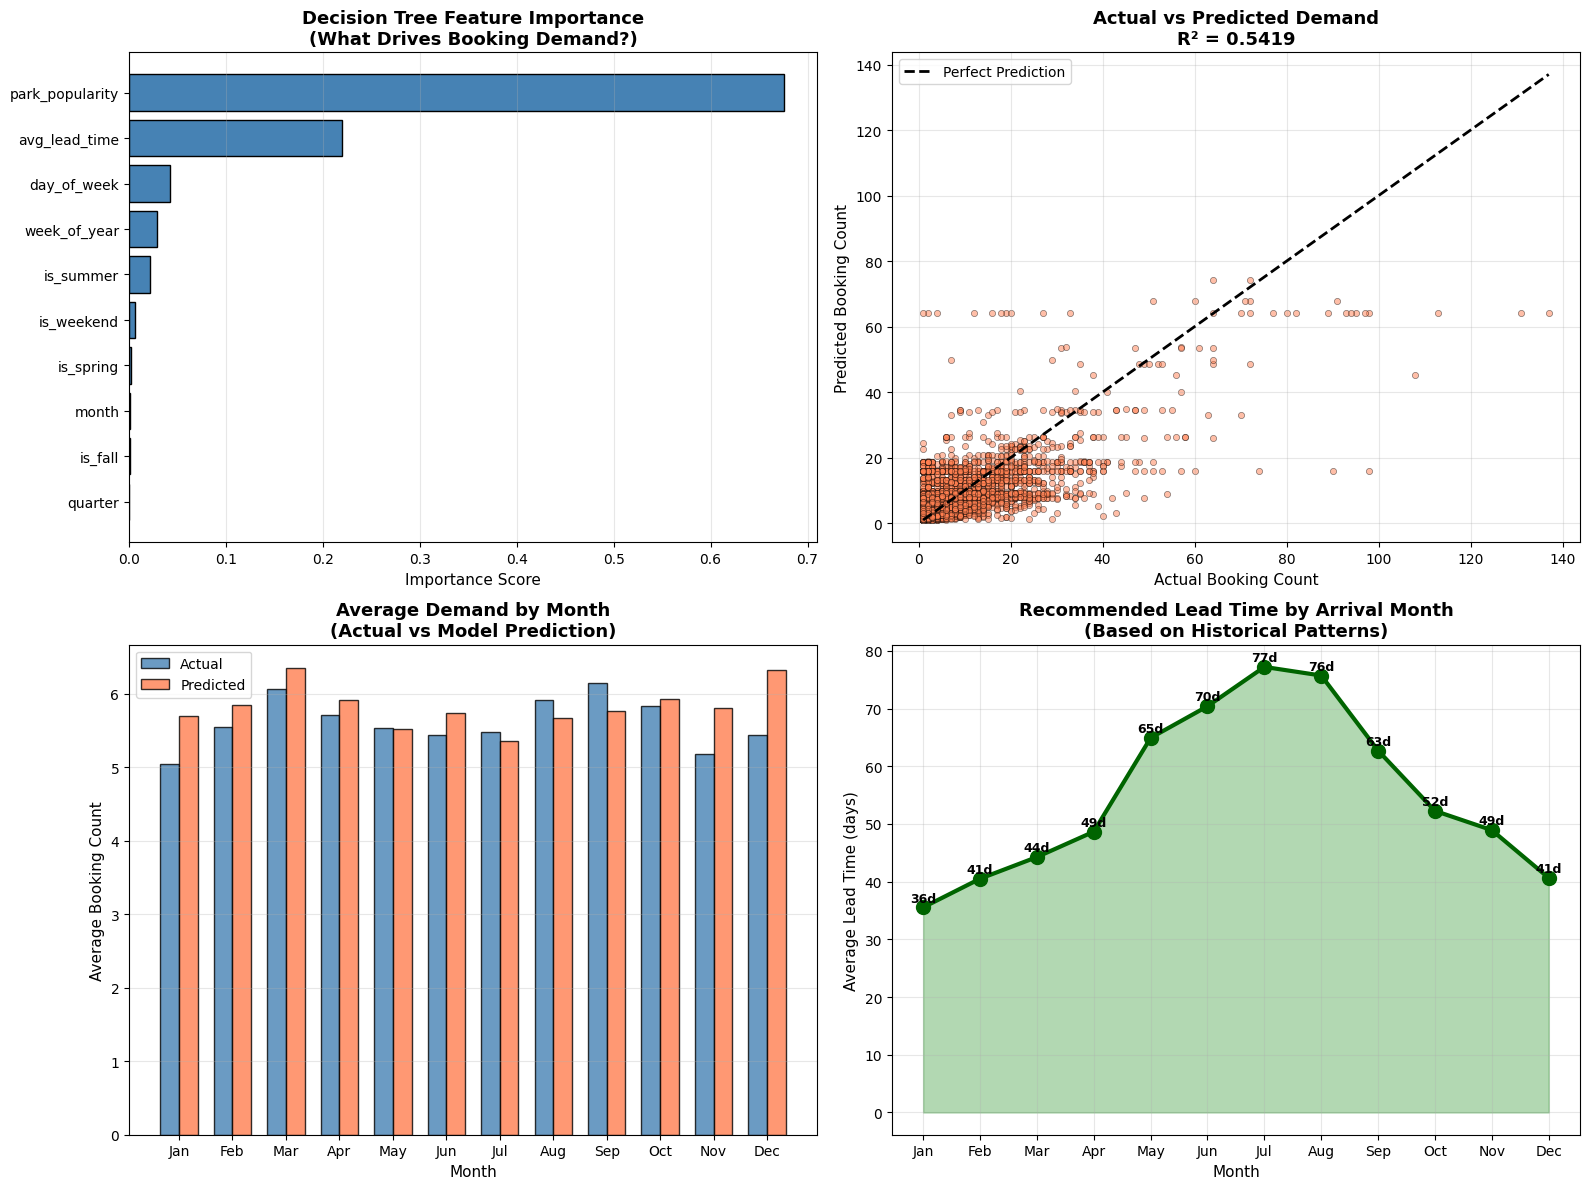

In [173]:
# Step 3: Visualize Decision Tree Results

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Feature Importance
axes[0, 0].barh(feature_importance['feature'], feature_importance['importance'], color='steelblue', edgecolor='black')
axes[0, 0].set_xlabel('Importance Score', fontsize=11)
axes[0, 0].set_title('Decision Tree Feature Importance\n(What Drives Booking Demand?)', fontsize=13, fontweight='bold')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(True, alpha=0.3, axis='x')

# 2. Actual vs Predicted
axes[0, 1].scatter(y_test, y_pred, alpha=0.5, s=20, color='coral', edgecolors='black', linewidth=0.5)
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
axes[0, 1].set_xlabel('Actual Booking Count', fontsize=11)
axes[0, 1].set_ylabel('Predicted Booking Count', fontsize=11)
axes[0, 1].set_title(f'Actual vs Predicted Demand\nR² = {r2:.4f}', fontsize=13, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Predicted Demand by Month
monthly_predictions = daily_demand.copy()
monthly_predictions['predicted_demand'] = dt_model.predict(X)
monthly_avg_demand = monthly_predictions.groupby('month').agg({
    'booking_count': 'mean',
    'predicted_demand': 'mean'
}).reset_index()

x_pos = np.arange(len(months))
width = 0.35

bars1 = axes[1, 0].bar(x_pos - width/2, monthly_avg_demand['booking_count'], width, 
                        label='Actual', color='steelblue', alpha=0.8, edgecolor='black')
bars2 = axes[1, 0].bar(x_pos + width/2, monthly_avg_demand['predicted_demand'], width, 
                        label='Predicted', color='coral', alpha=0.8, edgecolor='black')

axes[1, 0].set_xlabel('Month', fontsize=11)
axes[1, 0].set_ylabel('Average Booking Count', fontsize=11)
axes[1, 0].set_title('Average Demand by Month\n(Actual vs Model Prediction)', fontsize=13, fontweight='bold')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(months)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Lead Time by Month (from model insights)
lead_time_by_month_ml = daily_demand.groupby('month')['avg_lead_time'].mean().reset_index()
axes[1, 1].plot(range(1, 13), lead_time_by_month_ml['avg_lead_time'], 
                marker='o', linewidth=3, markersize=10, color='darkgreen')
axes[1, 1].fill_between(range(1, 13), lead_time_by_month_ml['avg_lead_time'], alpha=0.3, color='green')
axes[1, 1].set_xlabel('Month', fontsize=11)
axes[1, 1].set_ylabel('Average Lead Time (days)', fontsize=11)
axes[1, 1].set_title('Recommended Lead Time by Arrival Month\n(Based on Historical Patterns)', fontsize=13, fontweight='bold')
axes[1, 1].set_xticks(range(1, 13))
axes[1, 1].set_xticklabels(months)
axes[1, 1].grid(True, alpha=0.3)

# Add value labels
for i, v in enumerate(lead_time_by_month_ml['avg_lead_time']):
    axes[1, 1].text(i+1, v+1, f'{v:.0f}d', ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

In [174]:
# Step 4: Feature Engineering for K-means Clustering (Customer Behavior)

# Aggregate customer behavior patterns by week
customer_behavior = df_ml.groupby(['park', pd.Grouper(key='orderdate', freq='W')]).agg({
    'lead_time_days': ['mean', 'std', 'min', 'max'],
    'nights': ['mean', 'sum'],
    'numberofpeople': ['mean', 'sum'],
    'arrival_month': lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0]
}).reset_index()

# Flatten column names
customer_behavior.columns = ['park', 'booking_week', 
                              'lead_time_mean', 'lead_time_std', 'lead_time_min', 'lead_time_max',
                              'nights_mean', 'nights_total', 
                              'people_mean', 'people_total',
                              'preferred_arrival_month']

# Fill NaN std values with 0 (weeks with single booking)
customer_behavior['lead_time_std'] = customer_behavior['lead_time_std'].fillna(0)

# Add booking volume (number of bookings in that week)
booking_volume = df_ml.groupby(['park', pd.Grouper(key='orderdate', freq='W')]).size().reset_index(name='booking_volume')
booking_volume = booking_volume.rename(columns={'orderdate': 'booking_week'})
customer_behavior = customer_behavior.merge(booking_volume, on=['park', 'booking_week'], how='left')

# Create additional behavioral features
customer_behavior['avg_group_size'] = customer_behavior['people_total'] / customer_behavior['booking_volume']
customer_behavior['planning_consistency'] = customer_behavior['lead_time_std'] / (customer_behavior['lead_time_mean'] + 1)  # Coefficient of variation

# Remove rows with missing values
customer_behavior = customer_behavior.dropna()

print("="*70)
print("K-MEANS DATASET - Customer Behavior Patterns")
print("="*70)
print(f"Shape: {customer_behavior.shape}")
print(f"\nFeatures created:")
print(customer_behavior.columns.tolist())
print(f"\nSample data:")
print(customer_behavior.head(10))
print(f"\nBehavioral Statistics:")
print(customer_behavior[['lead_time_mean', 'nights_mean', 'people_mean', 'booking_volume']].describe())

K-MEANS DATASET - Customer Behavior Patterns
Shape: (17143, 14)

Features created:
['park', 'booking_week', 'lead_time_mean', 'lead_time_std', 'lead_time_min', 'lead_time_max', 'nights_mean', 'nights_total', 'people_mean', 'people_total', 'preferred_arrival_month', 'booking_volume', 'avg_group_size', 'planning_consistency']

Sample data:
                                   park              booking_week  \
0  (LAKE ALPINE)  SILVER TIP CAMPGROUND 2023-10-08 00:00:00+00:00   
1  (LAKE ALPINE)  SILVER TIP CAMPGROUND 2023-12-31 00:00:00+00:00   
2  (LAKE ALPINE)  SILVER TIP CAMPGROUND 2024-01-07 00:00:00+00:00   
3  (LAKE ALPINE)  SILVER TIP CAMPGROUND 2024-01-14 00:00:00+00:00   
4  (LAKE ALPINE)  SILVER TIP CAMPGROUND 2024-01-21 00:00:00+00:00   
5  (LAKE ALPINE)  SILVER TIP CAMPGROUND 2024-01-28 00:00:00+00:00   
6  (LAKE ALPINE)  SILVER TIP CAMPGROUND 2024-02-04 00:00:00+00:00   
7  (LAKE ALPINE)  SILVER TIP CAMPGROUND 2024-02-11 00:00:00+00:00   
8  (LAKE ALPINE)  SILVER TIP CAMPGROUND

In [175]:
# Step 5: Train K-means Clustering Model

# Select features for clustering
clustering_features = ['lead_time_mean', 'nights_mean', 'people_mean', 
                       'booking_volume', 'avg_group_size', 'planning_consistency']

X_cluster = customer_behavior[clustering_features].copy()

# Standardize features (K-means is sensitive to scale)
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Determine optimal number of clusters using silhouette score
silhouette_scores = []
K_range = range(2, 8)

print("Finding optimal number of clusters...")
for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_temp = kmeans_temp.fit_predict(X_cluster_scaled)
    score = silhouette_score(X_cluster_scaled, labels_temp)
    silhouette_scores.append(score)
    print(f"  k={k}: Silhouette Score = {score:.4f}")

# Use optimal k (or 4 if no clear winner)
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters: {optimal_k}")

# Train final K-means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer_behavior['cluster'] = kmeans.fit_predict(X_cluster_scaled)

print("="*70)
print("K-MEANS CLUSTERING RESULTS")
print("="*70)
print(f"Number of clusters: {optimal_k}")
print(f"Silhouette Score: {silhouette_scores[optimal_k-2]:.4f}")
print(f"\nCluster Distribution:")
print(customer_behavior['cluster'].value_counts().sort_index())

# Analyze each cluster
print("\n" + "="*70)
print("CLUSTER PROFILES (Customer Segments)")
print("="*70)

for i in range(optimal_k):
    cluster_data = customer_behavior[customer_behavior['cluster'] == i]
    print(f"\n📊 CLUSTER {i} (n={len(cluster_data)})")
    print(f"  Average Lead Time: {cluster_data['lead_time_mean'].mean():.1f} days")
    print(f"  Average Stay Duration: {cluster_data['nights_mean'].mean():.1f} nights")
    print(f"  Average Group Size: {cluster_data['people_mean'].mean():.1f} people")
    print(f"  Average Booking Volume: {cluster_data['booking_volume'].mean():.1f} bookings/week")
    print(f"  Planning Consistency: {cluster_data['planning_consistency'].mean():.2f}")
    
    # Determine cluster characteristics
    if cluster_data['lead_time_mean'].mean() > customer_behavior['lead_time_mean'].mean():
        print(f"  → Early Planners")
    else:
        print(f"  → Last-Minute Bookers")
    
    if cluster_data['nights_mean'].mean() > customer_behavior['nights_mean'].mean():
        print(f"  → Long-Stay Campers")
    else:
        print(f"  → Short-Stay Campers")

Finding optimal number of clusters...
  k=2: Silhouette Score = 0.5927
  k=3: Silhouette Score = 0.3278
  k=4: Silhouette Score = 0.3373
  k=5: Silhouette Score = 0.2982
  k=6: Silhouette Score = 0.3102
  k=7: Silhouette Score = 0.3162

Optimal number of clusters: 2
K-MEANS CLUSTERING RESULTS
Number of clusters: 2
Silhouette Score: 0.5927

Cluster Distribution:
cluster
0    16130
1     1013
Name: count, dtype: int64

CLUSTER PROFILES (Customer Segments)

📊 CLUSTER 0 (n=16130)
  Average Lead Time: 73.0 days
  Average Stay Duration: 2.4 nights
  Average Group Size: 4.4 people
  Average Booking Volume: 13.3 bookings/week
  Planning Consistency: 0.43
  → Last-Minute Bookers
  → Short-Stay Campers

📊 CLUSTER 1 (n=1013)
  Average Lead Time: 192.0 days
  Average Stay Duration: 2.6 nights
  Average Group Size: 35.2 people
  Average Booking Volume: 1.5 bookings/week
  Planning Consistency: 0.08
  → Early Planners
  → Long-Stay Campers


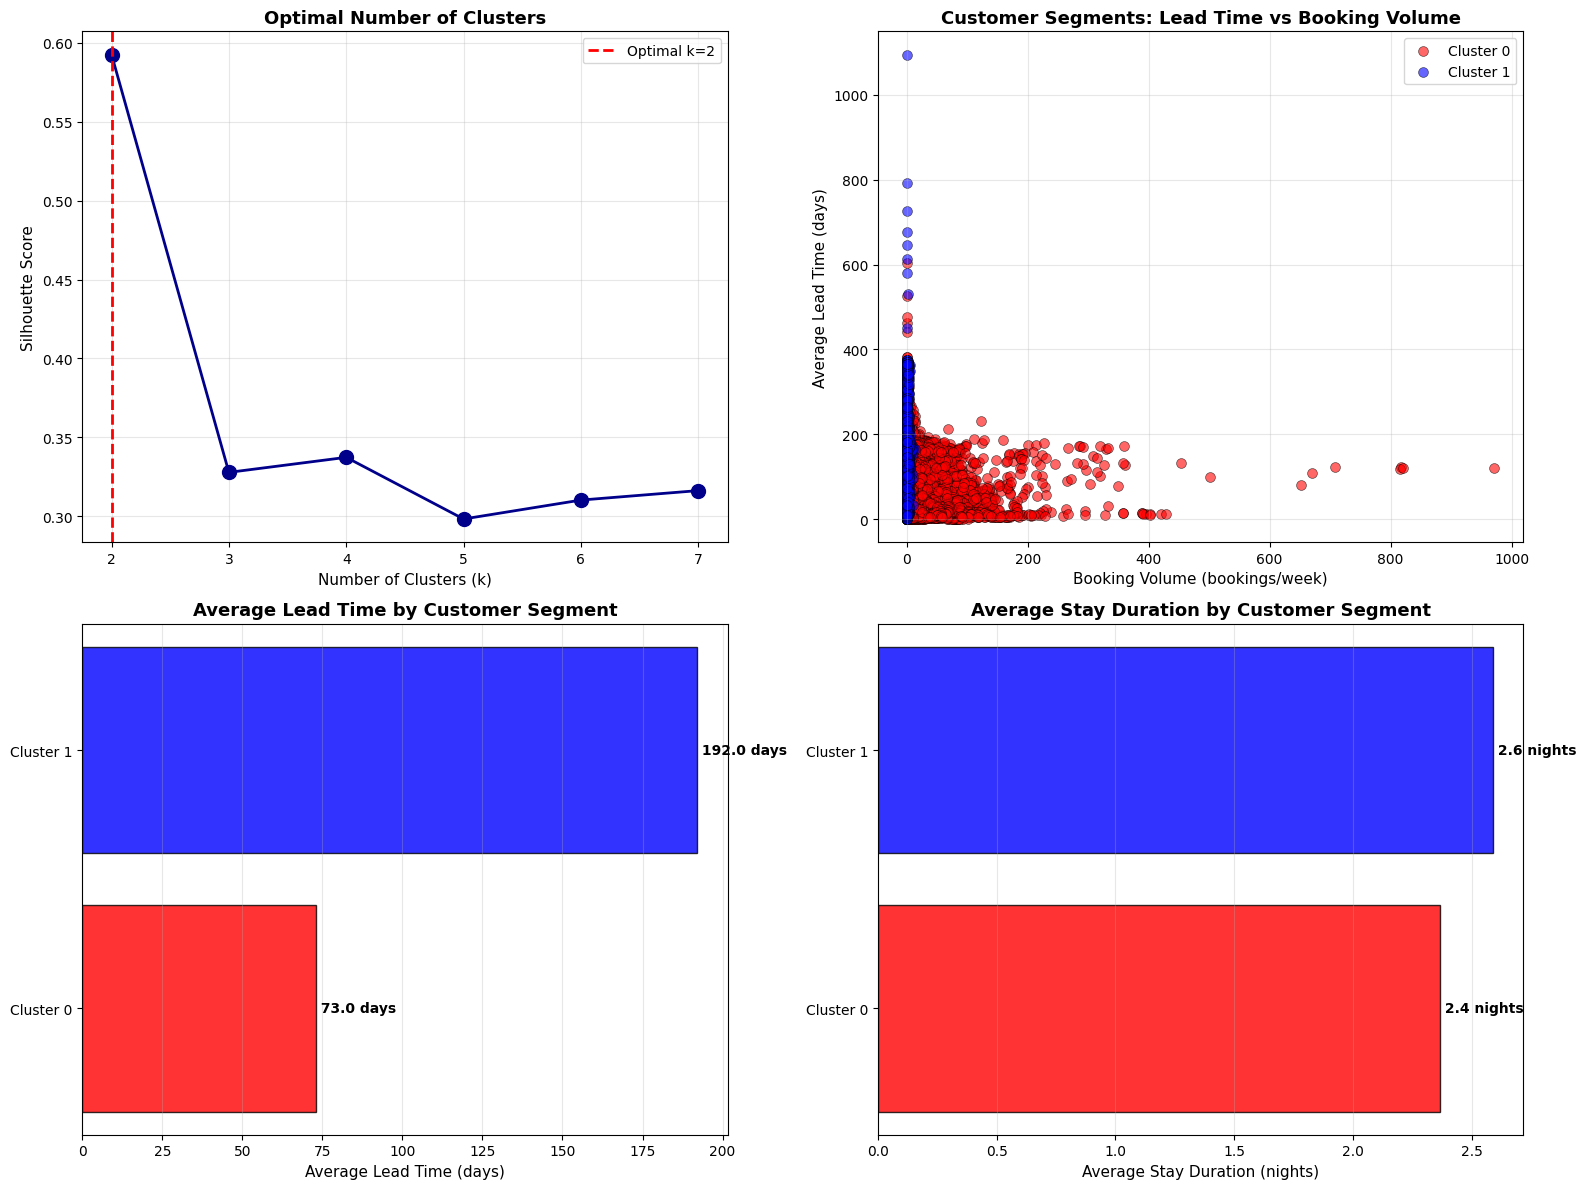

In [176]:
# Step 6: Visualize K-means Clustering Results

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Silhouette Scores for different k values
axes[0, 0].plot(K_range, silhouette_scores, marker='o', linewidth=2, markersize=10, color='darkblue')
axes[0, 0].axvline(optimal_k, color='red', linestyle='--', linewidth=2, label=f'Optimal k={optimal_k}')
axes[0, 0].set_xlabel('Number of Clusters (k)', fontsize=11)
axes[0, 0].set_ylabel('Silhouette Score', fontsize=11)
axes[0, 0].set_title('Optimal Number of Clusters', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Lead Time vs Booking Volume by Cluster
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
for i in range(optimal_k):
    cluster_data = customer_behavior[customer_behavior['cluster'] == i]
    axes[0, 1].scatter(cluster_data['booking_volume'], cluster_data['lead_time_mean'], 
                      alpha=0.6, s=50, c=colors[i], label=f'Cluster {i}', edgecolors='black', linewidth=0.5)

axes[0, 1].set_xlabel('Booking Volume (bookings/week)', fontsize=11)
axes[0, 1].set_ylabel('Average Lead Time (days)', fontsize=11)
axes[0, 1].set_title('Customer Segments: Lead Time vs Booking Volume', fontsize=13, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Cluster Characteristics - Lead Time
cluster_stats = customer_behavior.groupby('cluster')['lead_time_mean'].mean().sort_values()
bars = axes[1, 0].barh(range(len(cluster_stats)), cluster_stats.values, 
                       color=[colors[i] for i in cluster_stats.index], edgecolor='black', alpha=0.8)
axes[1, 0].set_yticks(range(len(cluster_stats)))
axes[1, 0].set_yticklabels([f'Cluster {i}' for i in cluster_stats.index])
axes[1, 0].set_xlabel('Average Lead Time (days)', fontsize=11)
axes[1, 0].set_title('Average Lead Time by Customer Segment', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (idx, value) in enumerate(zip(cluster_stats.index, cluster_stats.values)):
    axes[1, 0].text(value, i, f' {value:.1f} days', va='center', fontsize=10, fontweight='bold')

# 4. Cluster Characteristics - Stay Duration
cluster_nights = customer_behavior.groupby('cluster')['nights_mean'].mean().sort_values()
bars = axes[1, 1].barh(range(len(cluster_nights)), cluster_nights.values, 
                       color=[colors[i] for i in cluster_nights.index], edgecolor='black', alpha=0.8)
axes[1, 1].set_yticks(range(len(cluster_nights)))
axes[1, 1].set_yticklabels([f'Cluster {i}' for i in cluster_nights.index])
axes[1, 1].set_xlabel('Average Stay Duration (nights)', fontsize=11)
axes[1, 1].set_title('Average Stay Duration by Customer Segment', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (idx, value) in enumerate(zip(cluster_nights.index, cluster_nights.values)):
    axes[1, 1].text(value, i, f' {value:.1f} nights', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

/var/folders/1k/mqr7j__13sqbt372nn53l_4r0000gn/T/ipykernel_54143/1862454531.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_ml_with_clusters['booking_week_temp'] = df_ml_with_clusters['orderdate'].dt.to_period('W').dt.start_time
/var/folders/1k/mqr7j__13sqbt372nn53l_4r0000gn/T/ipykernel_54143/1862454531.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  customer_behavior['booking_week_temp'] = customer_behavior['booking_week'].dt.to_period('W').dt.start_time


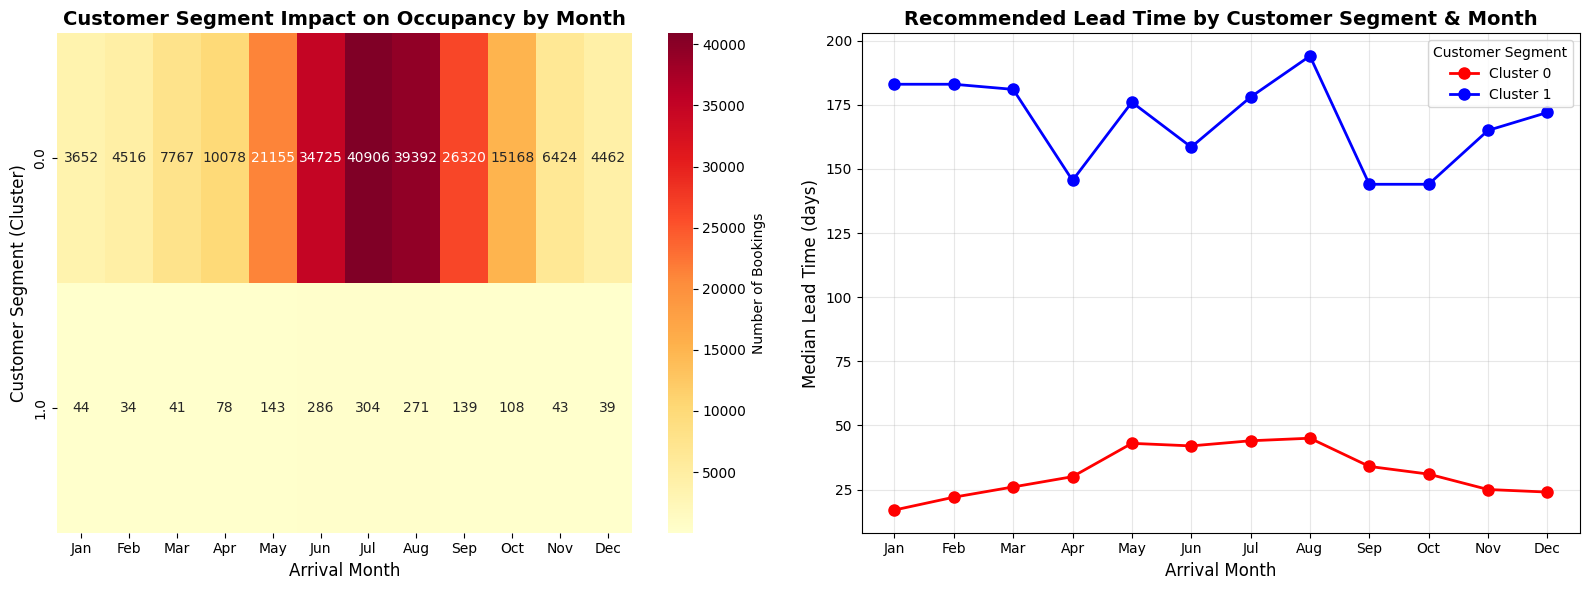

CUSTOMER BEHAVIOR IMPACT ON OCCUPANCY

Bookings by Customer Segment:
cluster
0.0    214565
1.0      1530
Name: count, dtype: int64

Percentage distribution:
cluster
0.0    99.29
1.0     0.71
Name: proportion, dtype: float64


In [177]:
# Step 7: Analyze Customer Behavior Impact on Occupancy

# Create a simpler approach: add cluster info directly based on park and week
df_ml_with_clusters = df_ml.copy()

# Create a mapping from (park, week) to cluster
# Convert orderdate to week start for matching
df_ml_with_clusters['booking_week_temp'] = df_ml_with_clusters['orderdate'].dt.to_period('W').dt.start_time
customer_behavior['booking_week_temp'] = customer_behavior['booking_week'].dt.to_period('W').dt.start_time

# Merge cluster information
df_ml_with_clusters = df_ml_with_clusters.merge(
    customer_behavior[['park', 'booking_week_temp', 'cluster']], 
    on=['park', 'booking_week_temp'],
    how='left'
)

# Drop the temporary column
df_ml_with_clusters = df_ml_with_clusters.drop('booking_week_temp', axis=1)

# Analyze occupancy patterns by cluster
occupancy_by_cluster = df_ml_with_clusters.groupby(['cluster', 'arrival_month']).size().reset_index(name='booking_count')

# Create heatmap data
occupancy_pivot = occupancy_by_cluster.pivot(index='cluster', columns='arrival_month', values='booking_count')
occupancy_pivot = occupancy_pivot.fillna(0)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Heatmap: Customer Segment vs Arrival Month
sns.heatmap(occupancy_pivot, annot=True, fmt='.0f', cmap='YlOrRd', 
            cbar_kws={'label': 'Number of Bookings'}, ax=axes[0])
axes[0].set_xlabel('Arrival Month', fontsize=12)
axes[0].set_ylabel('Customer Segment (Cluster)', fontsize=12)
axes[0].set_title('Customer Segment Impact on Occupancy by Month', fontsize=14, fontweight='bold')
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# 2. Lead Time Recommendations by Cluster and Month
lead_time_cluster_month = df_ml_with_clusters.groupby(['cluster', 'arrival_month'])['lead_time_days'].median().reset_index()

for i in range(optimal_k):
    cluster_data = lead_time_cluster_month[lead_time_cluster_month['cluster'] == i]
    if len(cluster_data) > 0:
        axes[1].plot(cluster_data['arrival_month'], cluster_data['lead_time_days'], 
                    marker='o', linewidth=2, markersize=8, label=f'Cluster {i}', color=colors[i])

axes[1].set_xlabel('Arrival Month', fontsize=12)
axes[1].set_ylabel('Median Lead Time (days)', fontsize=12)
axes[1].set_title('Recommended Lead Time by Customer Segment & Month', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[1].legend(title='Customer Segment')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("="*70)
print("CUSTOMER BEHAVIOR IMPACT ON OCCUPANCY")
print("="*70)
print("\nBookings by Customer Segment:")
print(df_ml_with_clusters['cluster'].value_counts().sort_index())
print(f"\nPercentage distribution:")
print((df_ml_with_clusters['cluster'].value_counts(normalize=True).sort_index() * 100).round(2))